<a href="https://colab.research.google.com/github/Svendpasak/Capstone-Project-SP/blob/master/BTC_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tahap Preprocessing
import keras
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import random as set_random_seed
from sklearn.preprocessing import MinMaxScaler
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from keras.models import sequential
from keras.layers import Dense,LSTM, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
from tensorflow.python.keras import Sequential
plt.style.use("fivethirtyeight")

In [219]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [220]:
# Read Data
df = pd.read_csv("data set BTC-USD.csv", index_col=0)
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-01,1180.040039,1222.500000,1179.689941,1222.500000,1222.500000,229056992
2017-03-02,1224.680054,1262.130005,1215.619995,1251.010010,1251.010010,368275008
2017-03-03,1250.709961,1280.310059,1250.709961,1274.989990,1274.989990,315739008
2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000
2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000
2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992


In [221]:
df.shape

(1583, 6)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583 entries, 2017-03-01 to 2021-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1583 non-null   float64
 1   High       1583 non-null   float64
 2   Low        1583 non-null   float64
 3   Close      1583 non-null   float64
 4   Adj Close  1583 non-null   float64
 5   Volume     1583 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 86.6+ KB


In [223]:
# Tahap Data Cleaning (Missing Value)
BTC = df.fillna(0)
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-26,31594.664063,32637.587891,30184.501953,32186.277344,32186.277344,38585385521
2021-06-27,32287.523438,34656.128906,32071.757813,34649.644531,34649.644531,35511640894
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044
2021-06-30,35908.386719,36074.757813,34086.152344,35040.835938,35040.835938,34059036099


In [224]:
# Pengecekan data Missing Value
BTC.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Text(0, 0.5, 'Close Price')

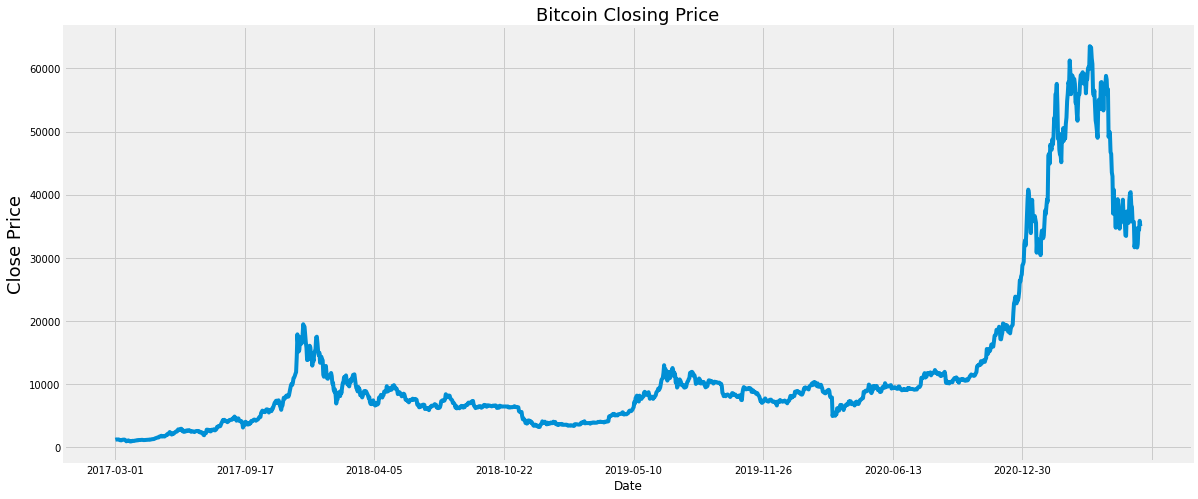

In [225]:
# Visualize the Closing Price
BTC["Close"].plot(figsize=(18,8))
plt.title("Bitcoin Closing Price", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)

In [226]:
# Create a new dataframe with only the "Close" cloumn
BTC = BTC.filter(["Close"])
# Convert the dataframe to a numpy array
BTC1 = BTC.values
# Get the number of Rows to train the model on
training_data_len = math.ceil(len(BTC1)*.80)
training_data_len

1267

In [227]:
# Scale the Data for Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(BTC1)
scaled_data

array([[0.00455487],
       [0.00501055],
       [0.00539383],
       ...,
       [0.53538423],
       [0.55829512],
       [0.545078  ]])

In [228]:
# Create the training data set
# create the scaled training data set
train_data = scaled_data[0: training_data_len, :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i <=  31:
        print(x_train)
        print(y_train)
        print()   

[array([0.00455487, 0.00501055, 0.00539383, 0.00507672, 0.00526804,
       0.0053593 , 0.0045715 , 0.0033961 , 0.00401129, 0.00286418,
       0.00380894, 0.00453697, 0.00470544, 0.00483458, 0.00498818,
       0.00400042, 0.00260062, 0.00058016, 0.00158585, 0.00186539,
       0.00292523, 0.00178404, 0.00161541, 0.        , 0.00056355,
       0.00046679, 0.00173017, 0.00175223, 0.00163747, 0.00142106])]
[0.002146056231466544]

[array([0.00455487, 0.00501055, 0.00539383, 0.00507672, 0.00526804,
       0.0053593 , 0.0045715 , 0.0033961 , 0.00401129, 0.00286418,
       0.00380894, 0.00453697, 0.00470544, 0.00483458, 0.00498818,
       0.00400042, 0.00260062, 0.00058016, 0.00158585, 0.00186539,
       0.00292523, 0.00178404, 0.00161541, 0.        , 0.00056355,
       0.00046679, 0.00173017, 0.00175223, 0.00163747, 0.00142106]), array([0.00501055, 0.00539383, 0.00507672, 0.00526804, 0.0053593 ,
       0.0045715 , 0.0033961 , 0.00401129, 0.00286418, 0.00380894,
       0.00453697, 0.00470544, 0

In [229]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [230]:
# Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1237, 30, 1)

In [231]:
# Build the Model
model = keras.Sequential()
model.add(layers.LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(1))

In [232]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

In [235]:
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [236]:
np.random.seed(0)
# Fitting / Train the Model
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
39/39 [==============================] - 9s 61ms/step - loss: 0.0018
Epoch 2/100
39/39 [==============================] - 2s 61ms/step - loss: 5.3436e-04
Epoch 3/100
39/39 [==============================] - 2s 61ms/step - loss: 4.9387e-04
Epoch 4/100
39/39 [==============================] - 2s 60ms/step - loss: 4.1651e-04
Epoch 5/100
39/39 [==============================] - 2s 60ms/step - loss: 3.8591e-04
Epoch 6/100
39/39 [==============================] - 2s 60ms/step - loss: 3.3549e-04
Epoch 7/100
39/39 [==============================] - 2s 59ms/step - loss: 3.1733e-04
Epoch 8/100
39/39 [==============================] - 2s 60ms/step - loss: 2.9657e-04
Epoch 9/100
39/39 [==============================] - 2s 60ms/step - loss: 2.9572e-04
Epoch 10/100
39/39 [==============================] - 2s 60ms/step - loss: 2.8610e-04
Epoch 11/100
39/39 [==============================] - 2s 59ms/step - loss: 2.9957e-04
Epoch 12/100
39/39 [==============================] - 2s 60ms/step 

In [237]:
# Create the testing data set
# Create a new array containing scale values from index .... to the end of data set
test_data = scaled_data[training_data_len-30:,:]

In [238]:
# Created the data set x_test and y_test
x_test = []
y_test = BTC1[training_data_len:,:]#---rest of the data
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [239]:
# Convert the Data to a numpy array
x_test = np.array(x_test)

In [240]:
# Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [241]:
# Get the model predicted price values / Denormalize
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [242]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, predictions)*100
print(MAPE)

9.43969329939092


In [ ]:
# Plot the Data
train = BTC[:training_data_len]
valid = BTC[training_data_len:]
valid["predictions"] = predictions

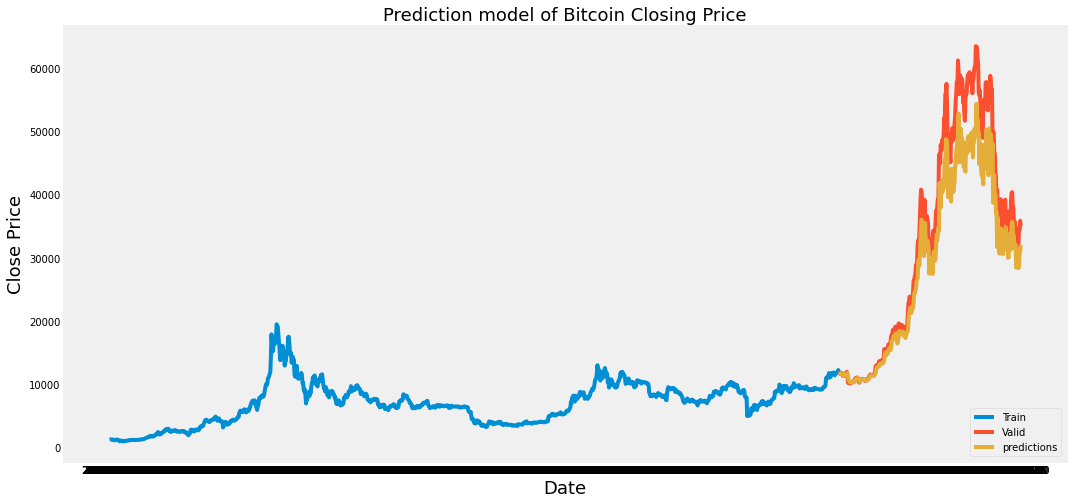

In [244]:
# Visualize the Data
plt.figure(figsize=(16,8))
plt.title("Prediction model of Bitcoin Closing Price", fontsize = 18)
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","Valid","predictions"],loc="lower right")
plt.grid()
plt.show()

In [245]:
#Show The Valid and Predicted Prices
valid[["Close" , "predictions"]]

,Close,predictions
Date,,
2020-08-19,11758.283203,11920.902344
2020-08-20,11878.372070,11723.311523
2020-08-21,11592.489258,11727.106445
2020-08-22,11681.825195,11584.745117
2020-08-23,11664.847656,11582.335938
...,...,...
2021-06-26,32186.277344,28370.703125
2021-06-27,34649.644531,28796.580078
2021-06-28,34434.335938,31216.191406


In [246]:
valid2 = valid[["Close" , "predictions"]]
valid2.head(20)

,Close,predictions
Date,,
2020-08-19,11758.283203,11920.902344
2020-08-20,11878.372070,11723.311523
2020-08-21,11592.489258,11727.106445
2020-08-22,11681.825195,11584.745117
2020-08-23,11664.847656,11582.335938
2020-08-24,11774.595703,11589.115234
2020-08-25,11366.134766,11656.359375
2020-08-26,11488.363281,11431.751953
2020-08-27,11323.397461,11398.187500


In [247]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3989.044344052215

In [ ]:
BTC["Close"].plot(figsize=(18,8))

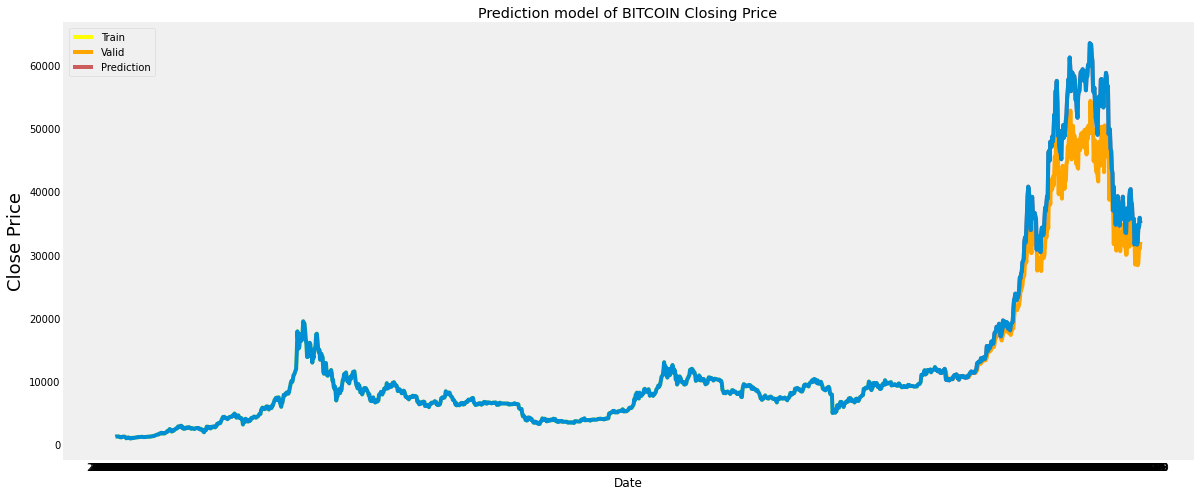

In [250]:
# Visualize the Data
plt.figure(figsize=(16,8))
plt.title("Prediction model of BITCOIN Closing Price")
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"], color="yellow")
plt.plot(valid["predictions"],color="orange")
plt.plot(valid["Close"],color="indianred")
plt.legend(["Train","Valid","Prediction"])
BTC["Close"].plot(figsize=(18,8))
plt.grid()
plt.show()